In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Read the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_Lab_SEE/Prg3/Advertising.csv')

In [ ]:
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


The data set shows how sales increases with different modes of digital marketing.
We need to predict the sales based on all digital modes.
To know if all features influence prediction we can plot the sales with each and check.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


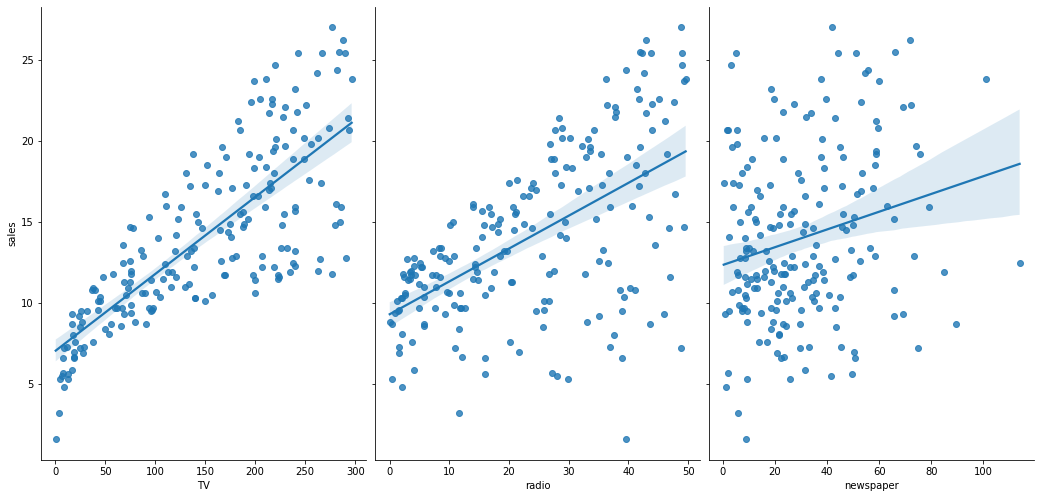

In [ ]:
import seaborn as sns
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

We can see that a linear relationship exist between all 3 and sales hence we can take in all 3 to create a multiple regression model.
Later we can remove features based on accuracy to see if they really influence the prediction of sales.

In [ ]:
xs = df.drop(['sales', 'Unnamed: 0'], axis=1)
y = df['sales'].values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()

Split the data into test and train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xs,y,random_state=1)

Apply MLR and print slopes and intercept

In [ ]:
model.fit(x_train, y_train)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1], model.coef_[0][2]))

Slope:  [[0.04656457 0.17915812 0.00345046]]
Intercept:  [2.87696662]
The linear model is: Y = 2.877 + 0.046565*TV + 0.17916*radio + 0.0034505*newspaper


Calculate any 2 errors

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
predictions = model.predict(x_test)
mae = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error = ",mae)
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error = ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error =  1.0668917082595213
Mean Squared Error =  1.9730456202283373
Root Mean Squared Error =  1.404651423032895


Reason : Difference between actual and predicted values

Retraining can be done by removing newspaper data as it doesn't seem to be much influence

In [ ]:
new_x= df.drop(['sales','newspaper', 'Unnamed: 0'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x,y,random_state=1)

In [ ]:
model.fit(x_train, y_train)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio".format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1]))

Slope:  [[0.04660234 0.18117959]]
Intercept:  [2.92723732]
The linear model is: Y = 2.9272 + 0.046602*TV + 0.18118*radio


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
predictions = model.predict(x_test)
mae = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error = ",mae)
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error = ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error =  1.0477590411212603
Mean Squared Error =  1.9262760418667428
Root Mean Squared Error =  1.3879034699382888


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.

Thus, it is unlikely that this feature (Newspaper)is useful for predicting Sales, and should be removed from the model.